AutoEncoder는 Encoder와 Decoder를 사용하여 이상치 탐지 등에 활용할 수 있는 모델입니다.

https://www.tensorflow.org/tutorials/generative/autoencoder?hl=ko


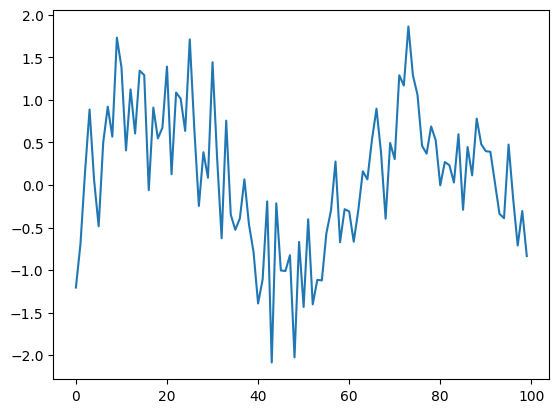

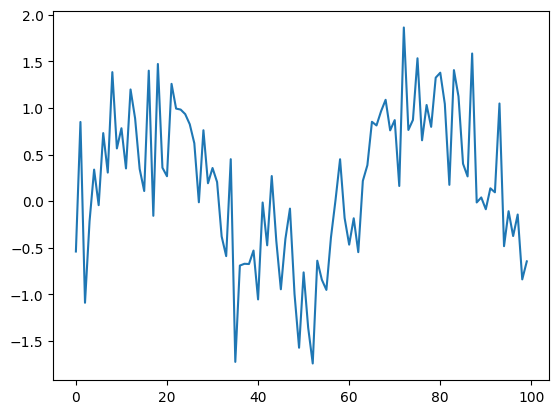

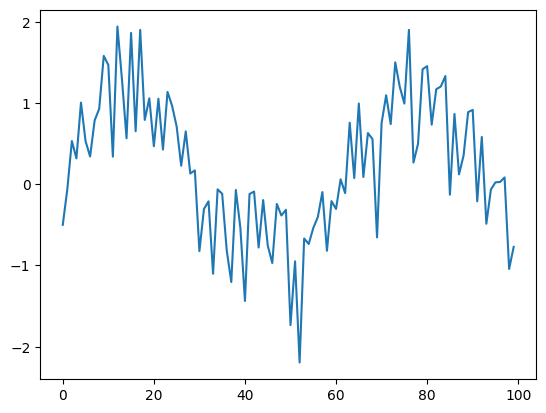

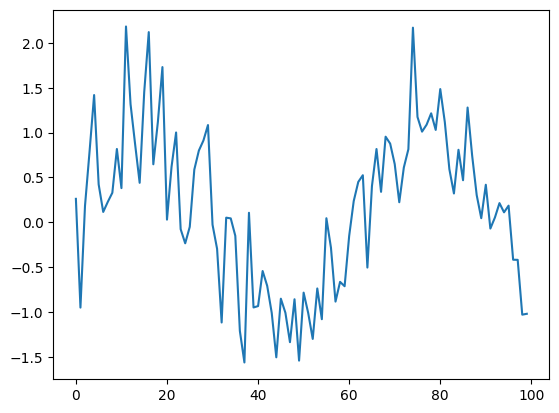

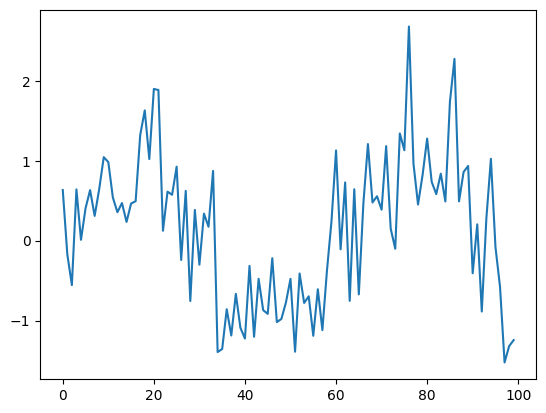

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋을 생성하는 함수
def create_signals(batch_size, length=100):
    t = np.linspace(0, 10, length)
    signals = np.sin(t) + np.random.normal(0, 0.5, (batch_size, length))
    return torch.tensor(signals, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1, length)

# 데이터 예시 출력
example_signals = create_signals(5)
for i in range(5):
    plt.plot(example_signals[i].squeeze().numpy())
    plt.show()


In [2]:
example_signals.shape

torch.Size([5, 1, 100])

Conv로 이루어진 autoencoder를 구성해보겠습니다.
Fully connected layer로 구성해도 됩니다

In [12]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3),
            nn.ReLU(),
            nn.Conv1d(16, 8, kernel_size=3),
            nn.ReLU(),
            nn.Conv1d(8, 4, kernel_size=3),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(4, 8, kernel_size=3),
            nn.ReLU(),
            nn.ConvTranspose1d(8, 16, kernel_size=3),
            nn.ReLU(),
            nn.ConvTranspose1d(16, 1, kernel_size=3),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded




In [13]:
autoencoder = Autoencoder()

In [14]:
from torchsummary import summary

summary(autoencoder, (1,100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 16, 98]              64
              ReLU-2               [-1, 16, 98]               0
            Conv1d-3                [-1, 8, 96]             392
              ReLU-4                [-1, 8, 96]               0
            Conv1d-5                [-1, 4, 94]             100
              ReLU-6                [-1, 4, 94]               0
   ConvTranspose1d-7                [-1, 8, 96]             104
              ReLU-8                [-1, 8, 96]               0
   ConvTranspose1d-9               [-1, 16, 98]             400
             ReLU-10               [-1, 16, 98]               0
  ConvTranspose1d-11               [-1, 1, 100]              49
             Tanh-12               [-1, 1, 100]               0
Total params: 1,109
Trainable params: 1,109
Non-trainable params: 0
-----------------------------------

학습을 해봅시다

In [15]:
def train(autoencoder, data, epochs=20, batch_size=10):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

    for epoch in range(epochs):
        for i in range(0, len(data), batch_size):
            signals = data[i:i+batch_size]
            optimizer.zero_grad()
            outputs = autoencoder(signals)
            loss = criterion(outputs, signals)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 데이터 생성 및 모델 훈련
signals = create_signals(100)
autoencoder = Autoencoder()
train(autoencoder, signals)


Epoch [1/20], Loss: 1.0467
Epoch [2/20], Loss: 0.9520
Epoch [3/20], Loss: 0.8500
Epoch [4/20], Loss: 0.7094
Epoch [5/20], Loss: 0.5318
Epoch [6/20], Loss: 0.3780
Epoch [7/20], Loss: 0.3001
Epoch [8/20], Loss: 0.2642
Epoch [9/20], Loss: 0.2510
Epoch [10/20], Loss: 0.2337
Epoch [11/20], Loss: 0.2140
Epoch [12/20], Loss: 0.1936
Epoch [13/20], Loss: 0.1691
Epoch [14/20], Loss: 0.1426
Epoch [15/20], Loss: 0.1200
Epoch [16/20], Loss: 0.1040
Epoch [17/20], Loss: 0.0940
Epoch [18/20], Loss: 0.0898
Epoch [19/20], Loss: 0.0878
Epoch [20/20], Loss: 0.0864


In [17]:
pred = autoencoder(signals[:5])

In [19]:
pred.shape

torch.Size([5, 1, 100])

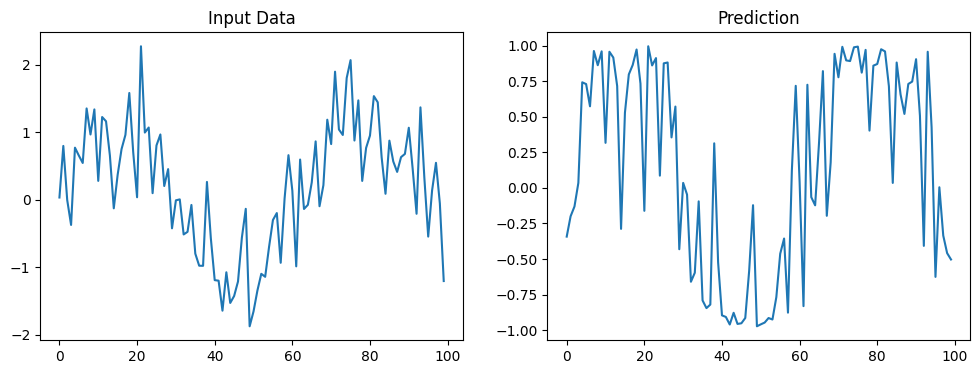

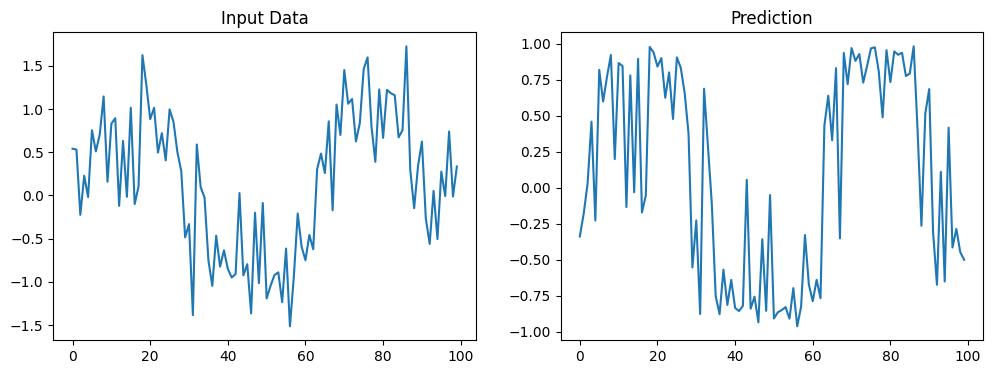

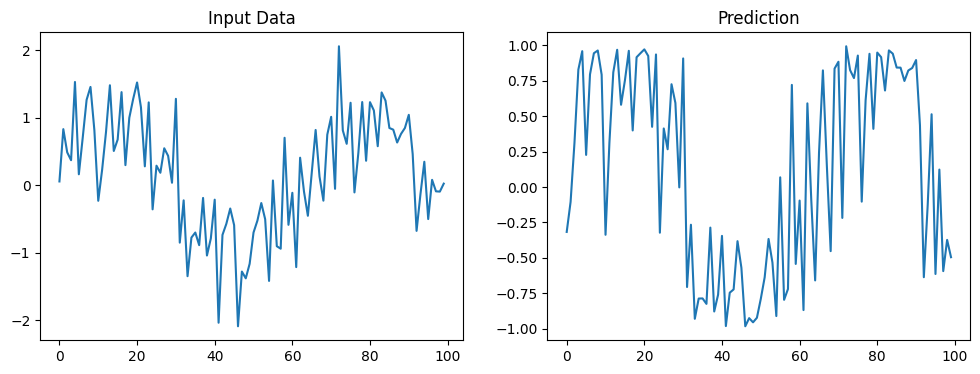

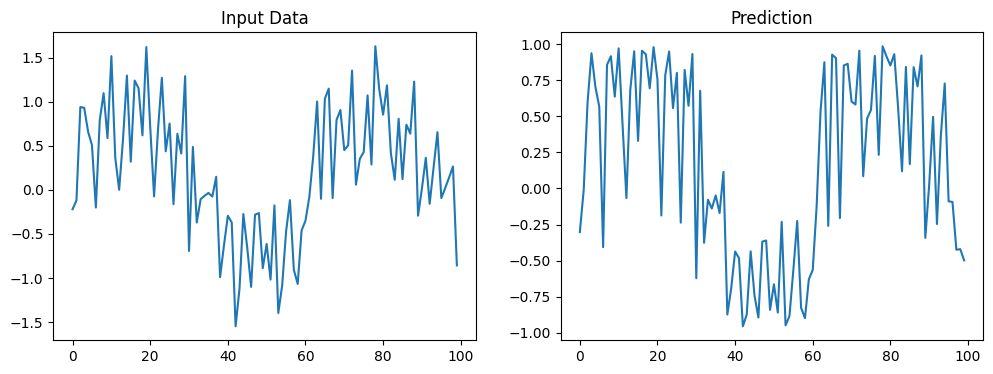

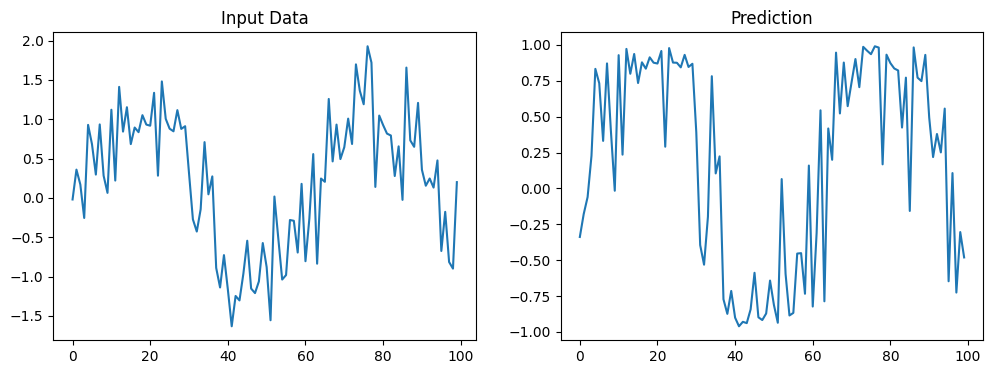

In [22]:

for i in range(5):
    plt.figure(figsize=(12, 4))  # 그래프의 크기 조정

    # 첫 번째 열: 입력 데이터
    plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 열
    plt.plot(signals[i].squeeze().numpy())  # 입력 데이터 플로팅
    plt.title("Input Data")

    # 두 번째 열: 예측 결과
    plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 열
    plt.plot(pred[i].detach().squeeze().numpy())  # 예측 데이터 플로팅
    plt.title("Prediction")

    plt.show()